In [1]:
import pandas as pd
import os
import sqlite3
import matplotlib.pylab as plt
%config Completer.use_jedi = False #for auto complete code

In [54]:
def tables_in_sqlite_db(conn):
    cursor = conn.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = [
        v[0] for v in cursor.fetchall()
        if v[0] != "sqlite_sequence"
    ]
    cursor.close()
    return tables

class Exploratory:
    def __init__(self,database):
        self.database = database
        sql_query= "SELECT * FROM Maestro"
        self.Maestro = pd.read_sql(sql_query, conn)
        
        self.tables_dz={}
        self.tables_clima={}
        
    def estaciones_con_clima_similar(self):
        pass
    
    def estaciones_por_dz(self,num):
        tables = tables_in_sqlite_db(self.database)
        filtro= self.Maestro[self.Maestro.DZ==num]
        name=list(filtro.NOMBRE_ESTACION+' '+filtro.CATEGORIA)
        
        for i,estacion in enumerate(filtro.CODIGO):
            estacion='T'+str(estacion)
            if estacion in tables:
                sql_query= "SELECT * FROM "+estacion
                
                self.tables_dz[name[i]]=pd.read_sql(sql_query, conn)
                
        return self.tables_dz
                
    def get_Maestro(self):
        return self.Maestro
    
    def plot_dz_niveles(self):
        for estacion in self.tables_dz:
            df = self.tables_dz[estacion]
            df.columns=['Codigo','Estacion','Fecha Reg','ano','mes','dia','Nivel 06h','Nivel 10h','Nivel 14h','Nivel 18h','Nivel Med','Caudal']
            df[['Nivel 06h','Nivel 10h','Nivel 14h','Nivel 18h','Nivel Med']]=df[['Nivel 06h','Nivel 10h','Nivel 14h','Nivel 18h','Nivel Med']].apply(pd.to_numeric,errors='coerce')
            df.plot(x='Fecha Reg',y=['Nivel 06h','Nivel 10h','Nivel 14h','Nivel 18h','Nivel Med'],figsize = (25,10),title=estacion)
        plt.show()
        
    def stats_dz_niveles(self):
        for estacion in self.tables_dz:
            df = self.tables_dz[estacion]
            print(estacion)
            print(df[['Nivel 06h','Nivel 10h','Nivel 14h','Nivel 18h','Nivel Med']].describe())
            
        

In [55]:
conn = sqlite3.connect('../data/DZ/niveles.db')
EDA=Exploratory(database=conn)

In [56]:
EDA.get_Maestro().head(10)

,INVENTARIO_SINCERADO,DZ,NOMBRE_ESTACION,CODIGO,CATEGORIA,CLASIFICACION,TIPO,COMUNICACION,FECHA_DE_INSTALACION,ESTADO_FUNCIONAMIENTO,ESTADO_OPERATIVIDAD,LATITUD,LONGITUD,Lat_Sexagesimal,Lot_Sexagesimal,ALTITUD,DEPARTAMENTO,PROVINCIA,DISTRITO,COD_Clima
0,NO,3,EL_TAMBO,211003,CONVENCIONAL,HLM,HIDROLÓGICA,SIN_DATO,2022-04-08 00:00:00,FUNCIONANDO,OPERATIVO,-7.573976,-78.706554,"-7°34'26.31""","-78°42'23.59""",688.0,LA LIBERTAD,GRAN CHIMÚ,MARMOT,D (i) B'
1,NO,3,EL_TAMBO,47E0A2A8,AUTOMATICA,EHMA,HIDROMETEOROLÓGICA,SATELITAL GOES,06/02/15,FUNCIONANDO,OPERATIVO,-7.573976,-78.706554,"-7°34'26.31""","-78°42'23.59""",688.0,LA LIBERTAD,GRAN CHIMÚ,MARMOT,D (i) B'
2,NO,3,PUENTE_COINA,211004,CONVENCIONAL,HLM,HIDROLÓGICA,SIN_DATO,SIN_DATO,FUNCIONANDO,OPERATIVO,-7.796364,-78.380122,"-7°47'46.91""","-78°22'48.44""",1823.0,LA LIBERTAD,OTUZCO,USQUIL,D (i) B'
3,NO,3,PUENTE_COINA,472E74CC,AUTOMATICA,EHMA,HIDROMETEOROLÓGICA,SATELITAL GOES,SIN_DATO,FUNCIONANDO,OPERATIVO,-7.796364,-78.380122,"-7°47'46.91""","-78°22'48.44""",1823.0,LA LIBERTAD,OTUZCO,USQUIL,D (i) B'
4,NO,3,PUENTE_PALMIRA,211002,CONVENCIONAL,HLM,HIDROLÓGICA,SIN_DATO,SIN_DATO,FUNCIONANDO,OPERATIVO,-7.549189,-78.810514,"-7°32'57.08""","-78°48'37.85""",647.0,LA LIBERTAD,GRAN CHIMÚ,CASCAS,D (i) B'
5,NO,3,PUENTE_PALMIRA,472E5220,AUTOMATICA,EHMA,HIDROMETEOROLÓGICA,SATELITAL GOES,SIN_DATO,FUNCIONANDO,OPERATIVO,-7.549189,-78.810514,"-7°32'57.08""","-78°48'37.85""",647.0,LA LIBERTAD,GRAN CHIMÚ,CASCAS,D (i) B'
6,NO,4,AUTISHA,202903,CONVENCIONAL,HLM,HIDROLÓGICA,PLANILLA,01/10/14,FUNCIONANDO,INOPERATIVO*,-11.735228,-76.606583,"-11°44'6.82""","-76°36'23.7""",2152.0,LIMA,HUAROCHIRI,SAN ANTONIO,D (i) B'
7,NO,4,CALLANCA,47E244AE,AUTOMATICA,EHA,HIDROLÓGICA,SATELITAL GOES,23/09/14,FUNCIONANDO,OPERATIVO,-11.388869,-76.769525,"-11°23'19.93""","-76°46'10.29""",2616.0,LIMA,HUARAL,SUMBILCA,D (i) B'
8,NO,4,CUCHUANCA,47E2323E,AUTOMATICA,EHA,HIDROLÓGICA,SATELITAL GOES,23/09/14,FUNCIONANDO,OPERATIVO,-11.201578,-76.788094,"-11°12'5.68""","-76°47'17.14""",2310.0,LIMA,HUARAL,VEINTISIETE DE NOVIEMBRE,D (i) B'
9,NO,4,OBRAJILLO,202802,CONVENCIONAL,HLG,HIDROLÓGICA,VOZ Y DATA,25/09/68,FUNCIONANDO,OPERATIVO,-11.452928,-76.622172,"-11°27'10.54""","-76°37'19.82""",2706.0,LIMA,CANTA,SAN BUENAVENTURA,D (i) B'


In [57]:
estaciones=EDA.estaciones_por_dz(4)

C:\Users\jose\anaconda3\envs\work_env\lib\site-packages\pandas\plotting\_matplotlib\core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


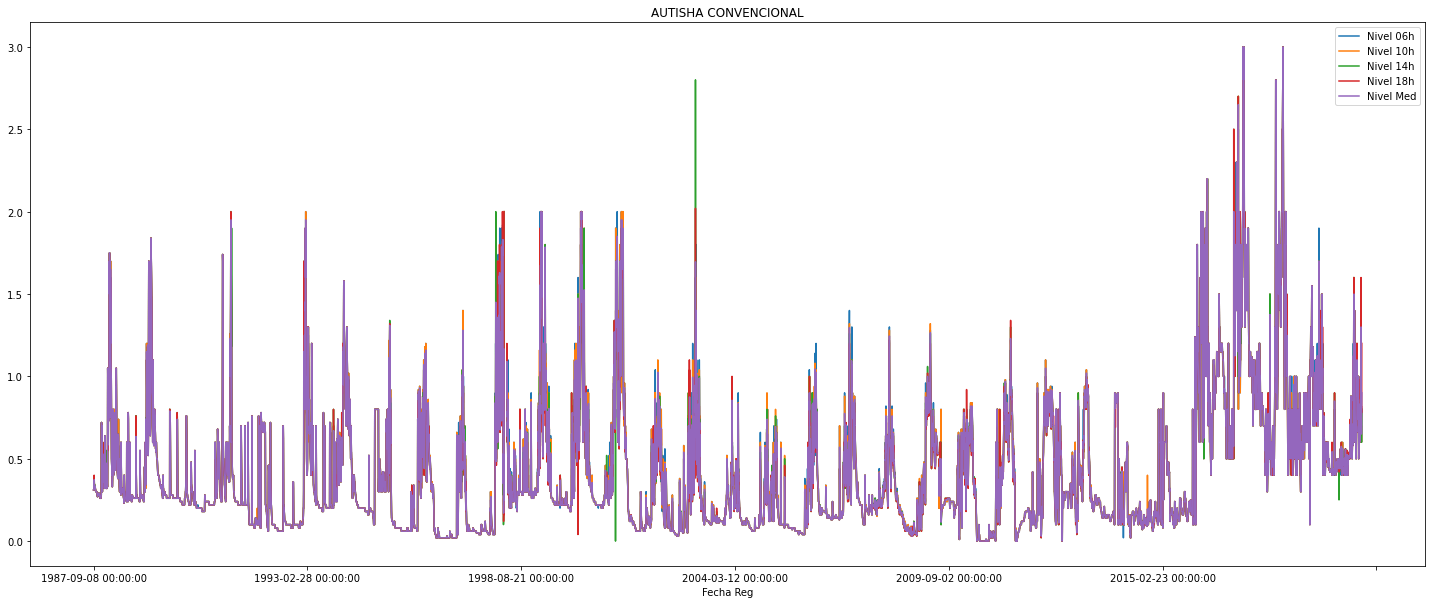

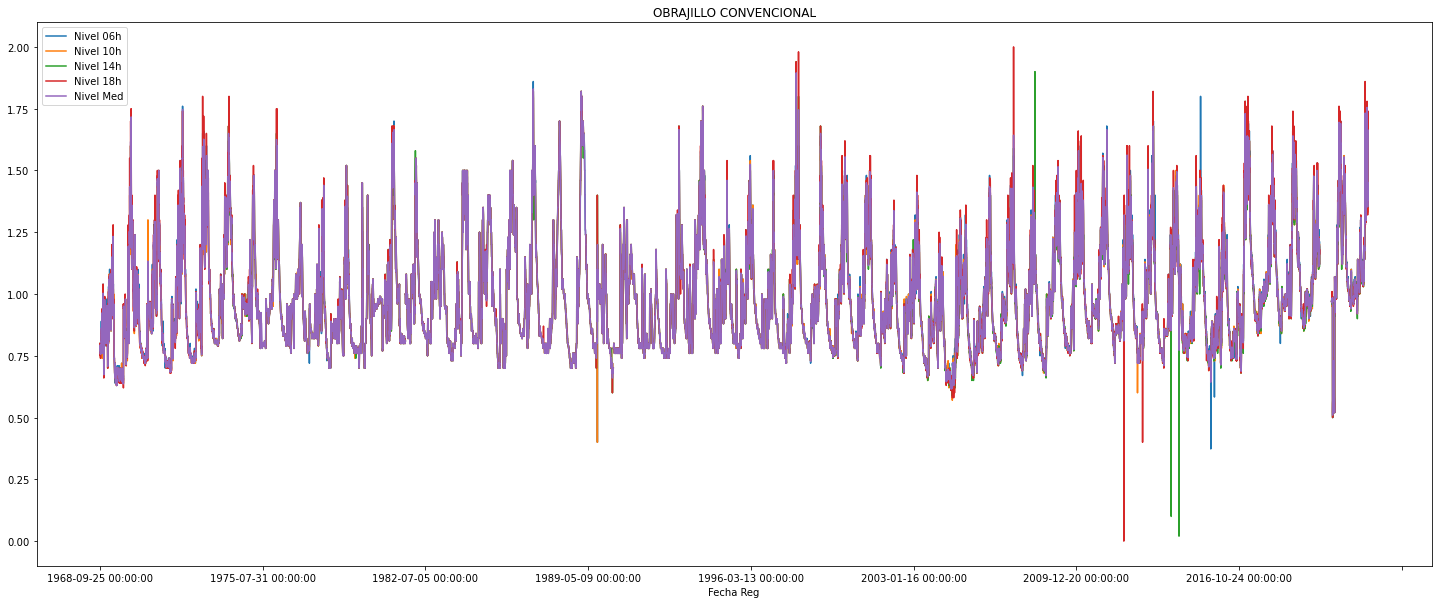

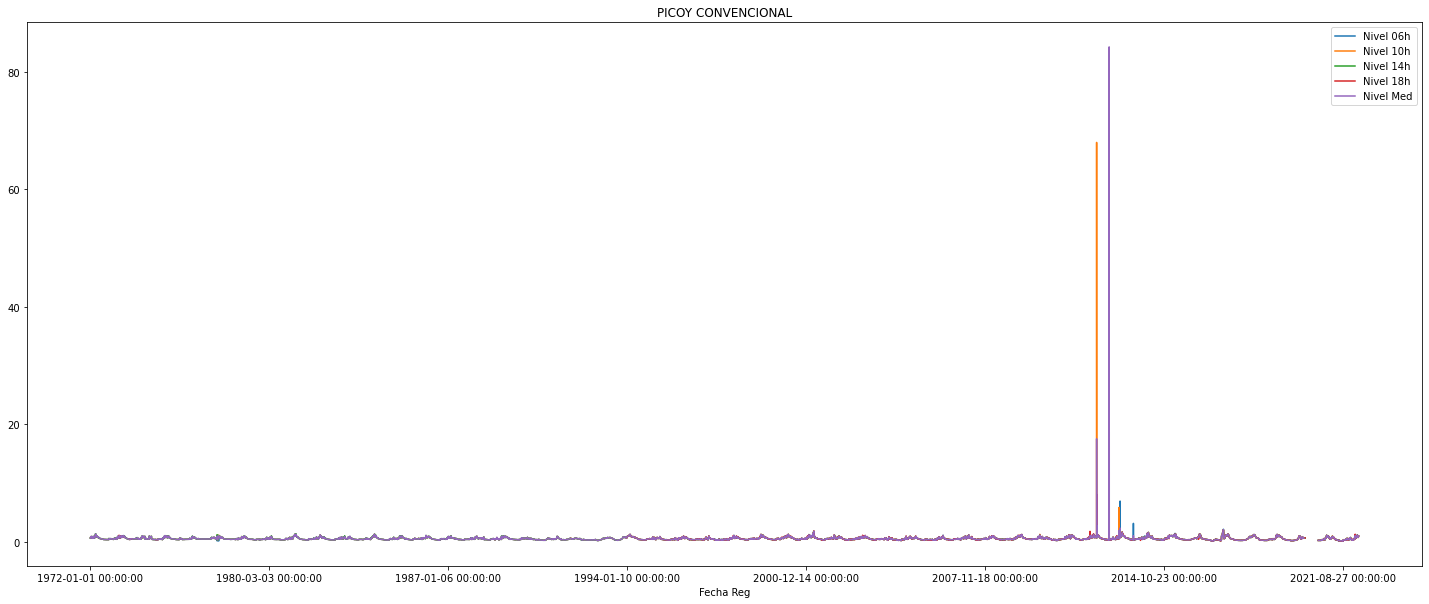

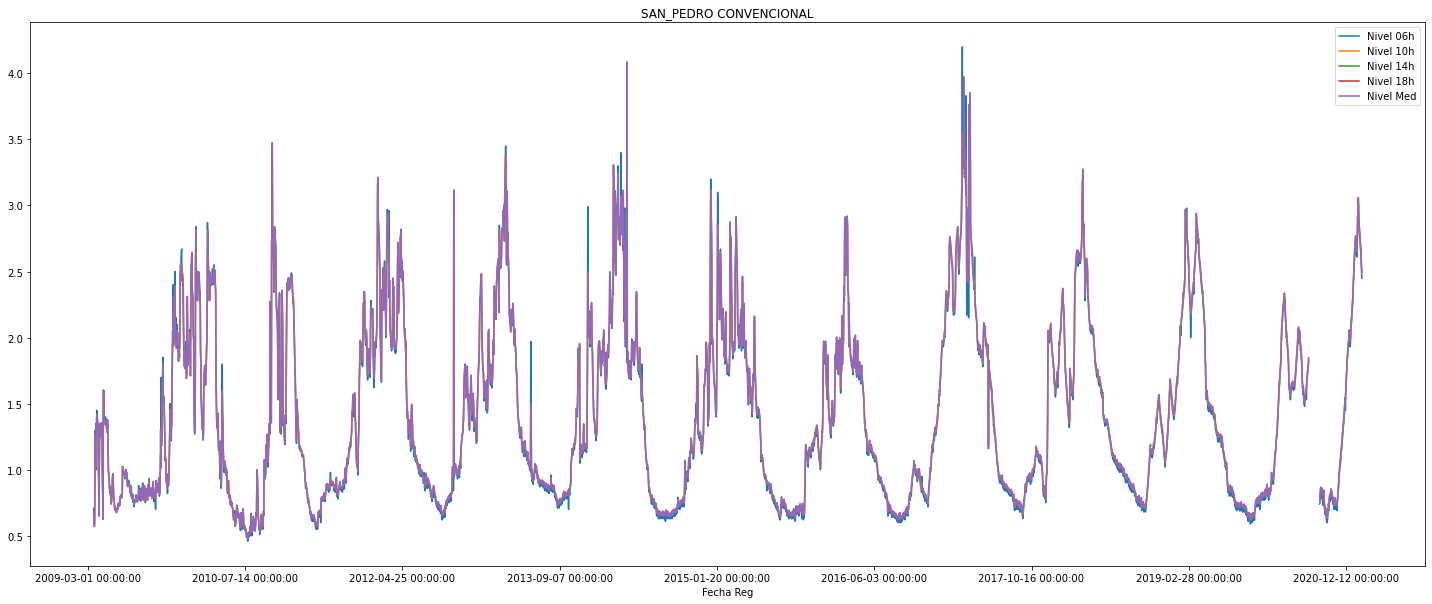

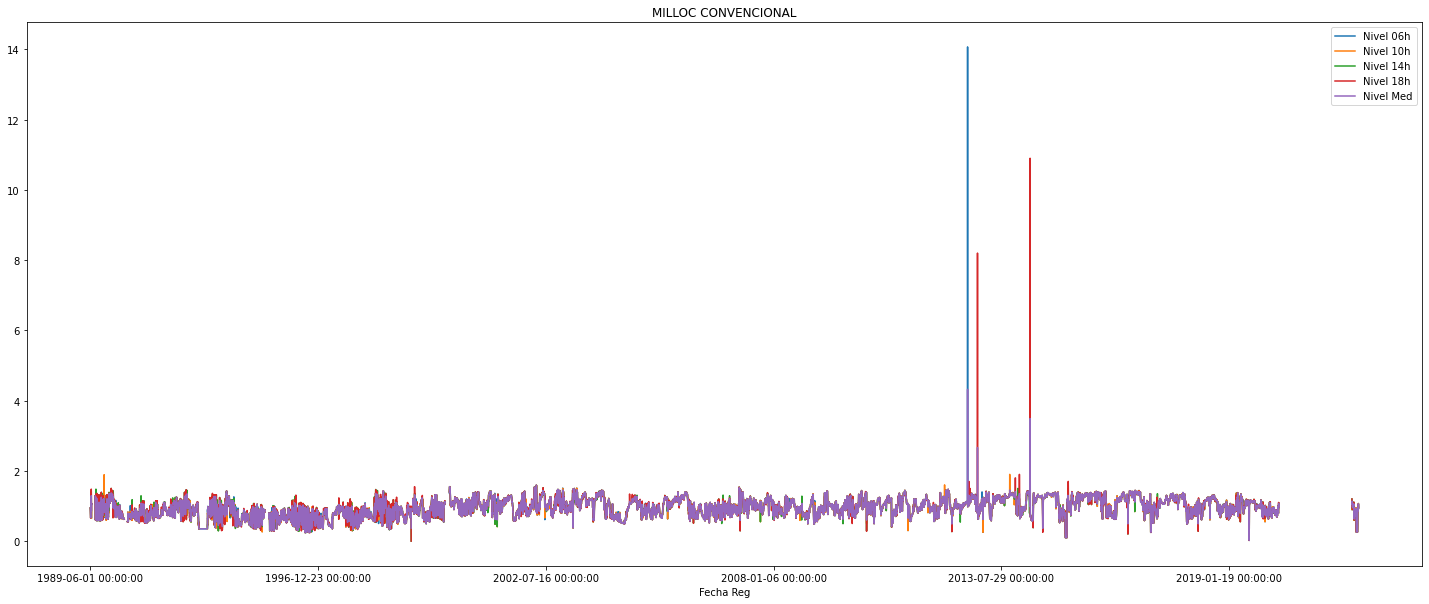

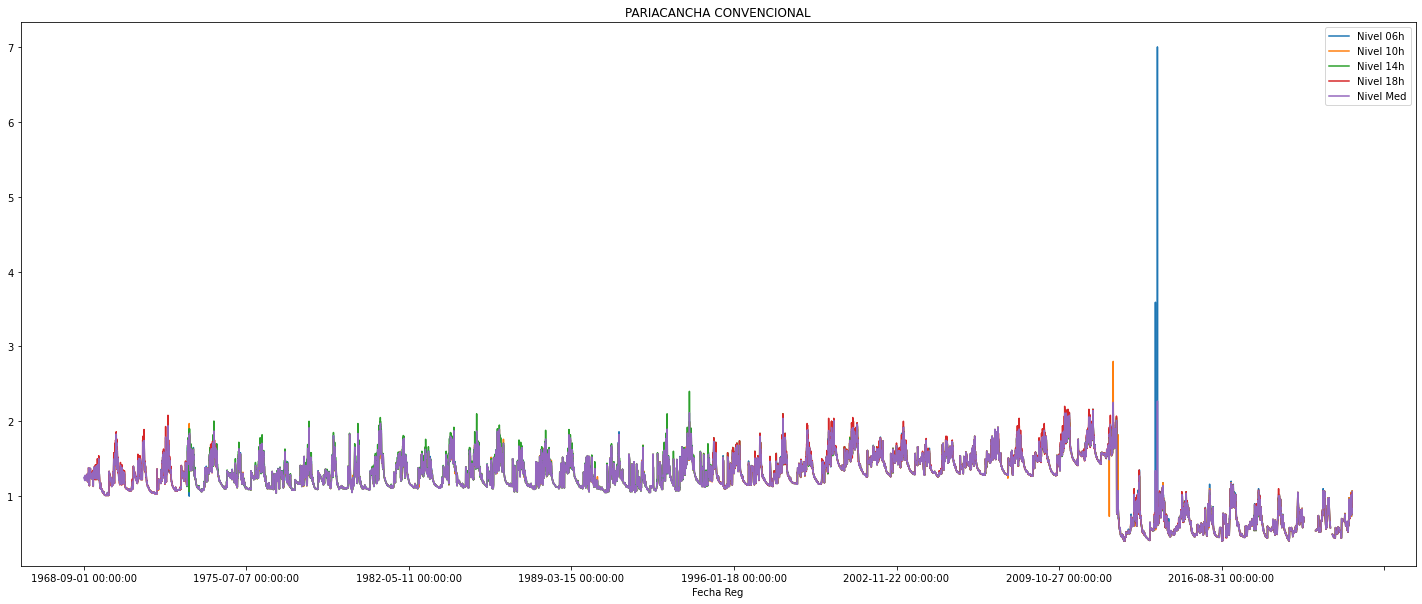

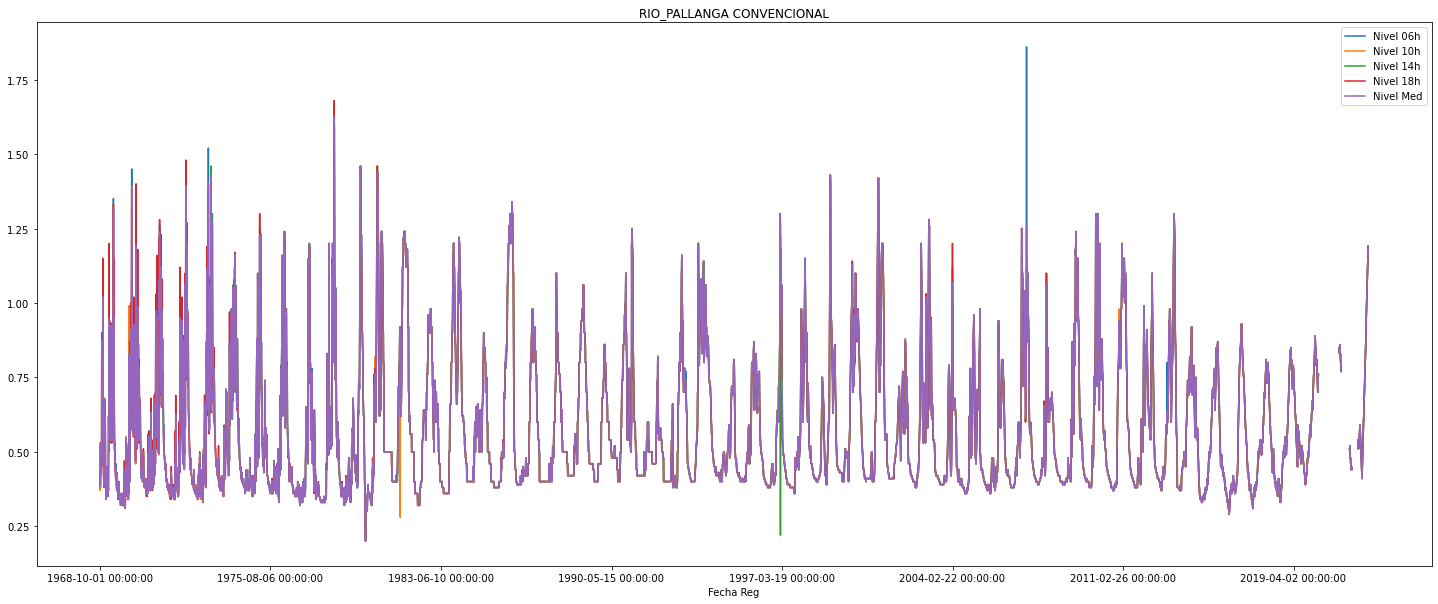

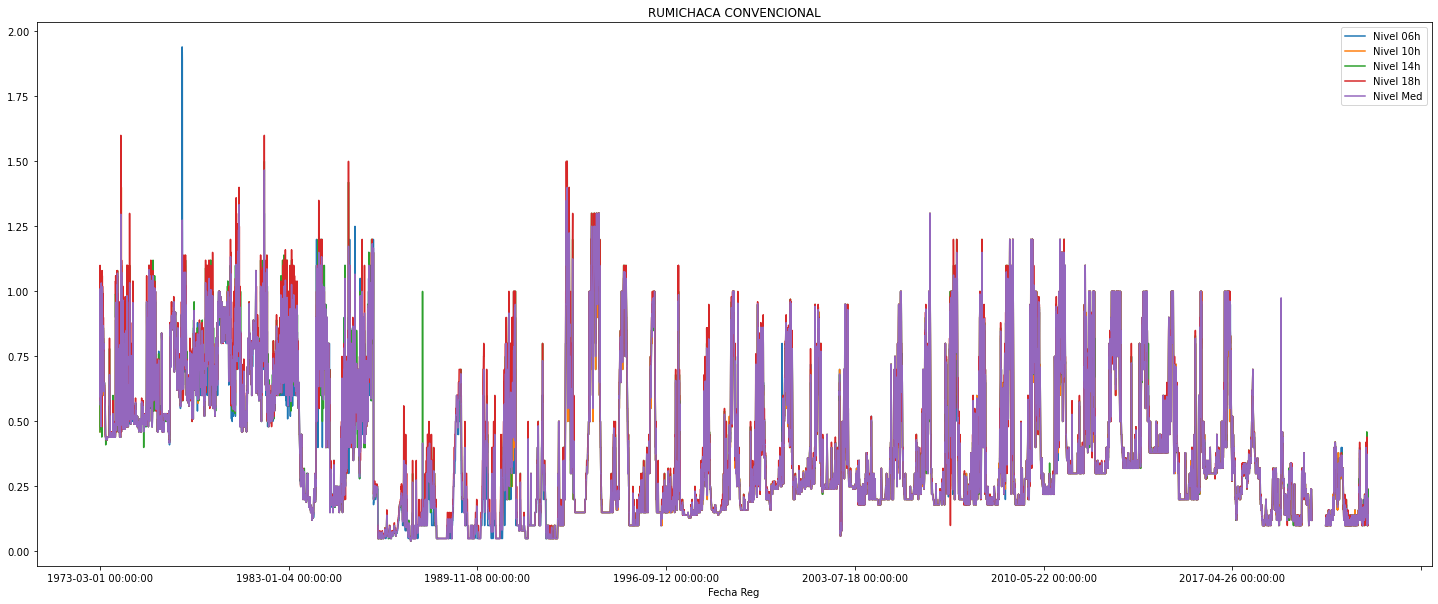

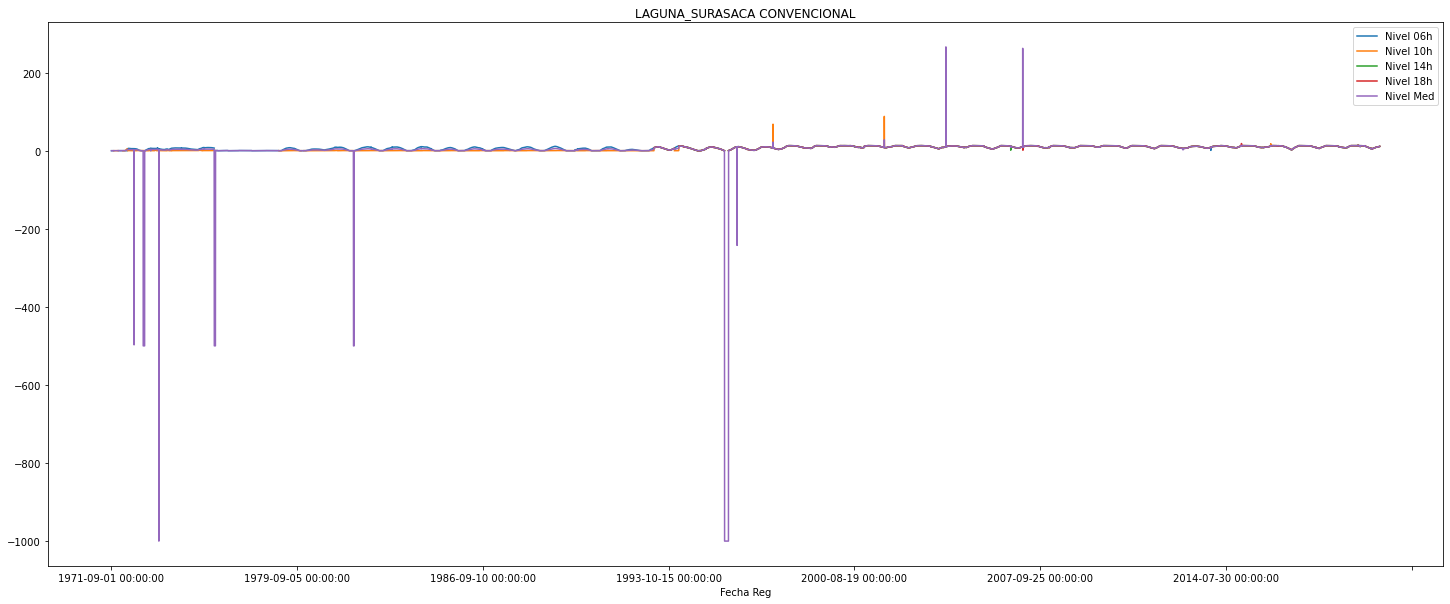

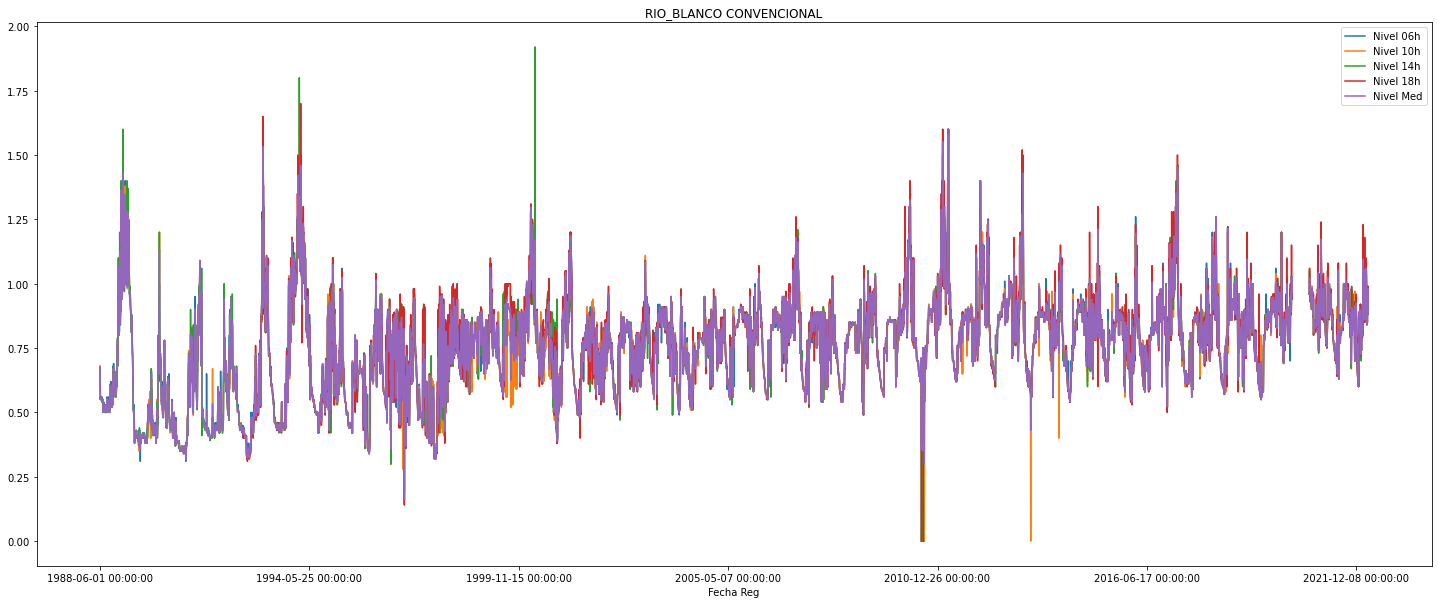

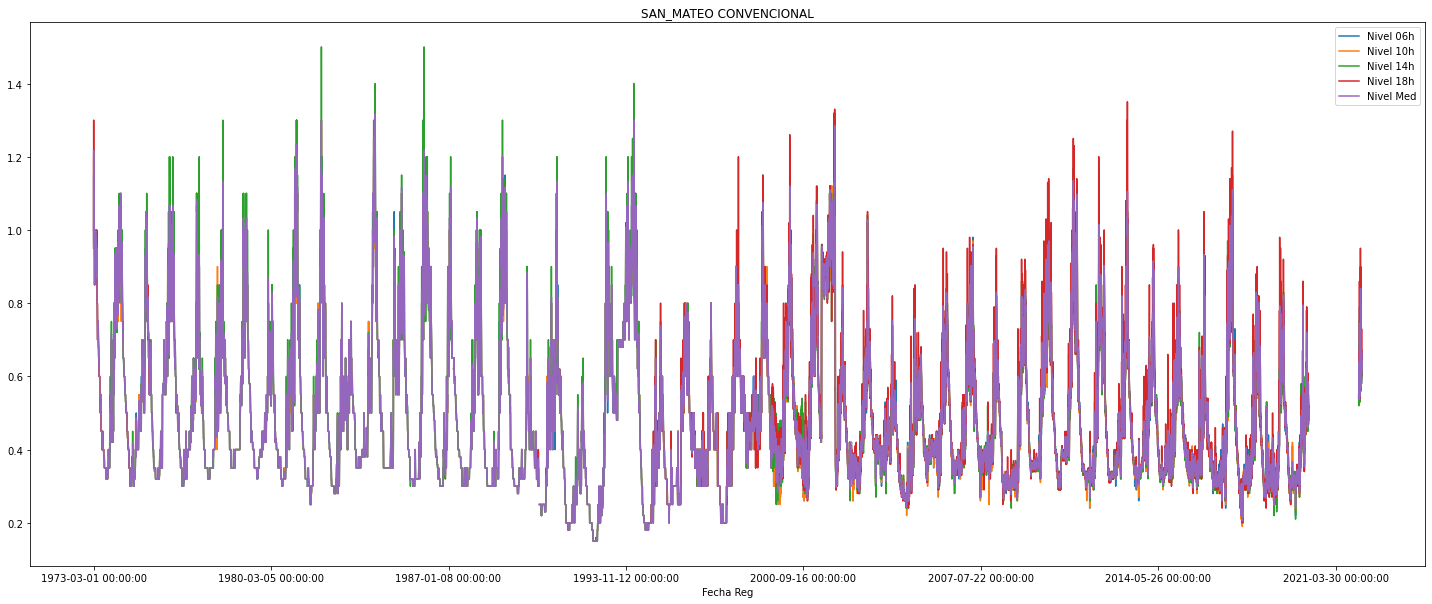

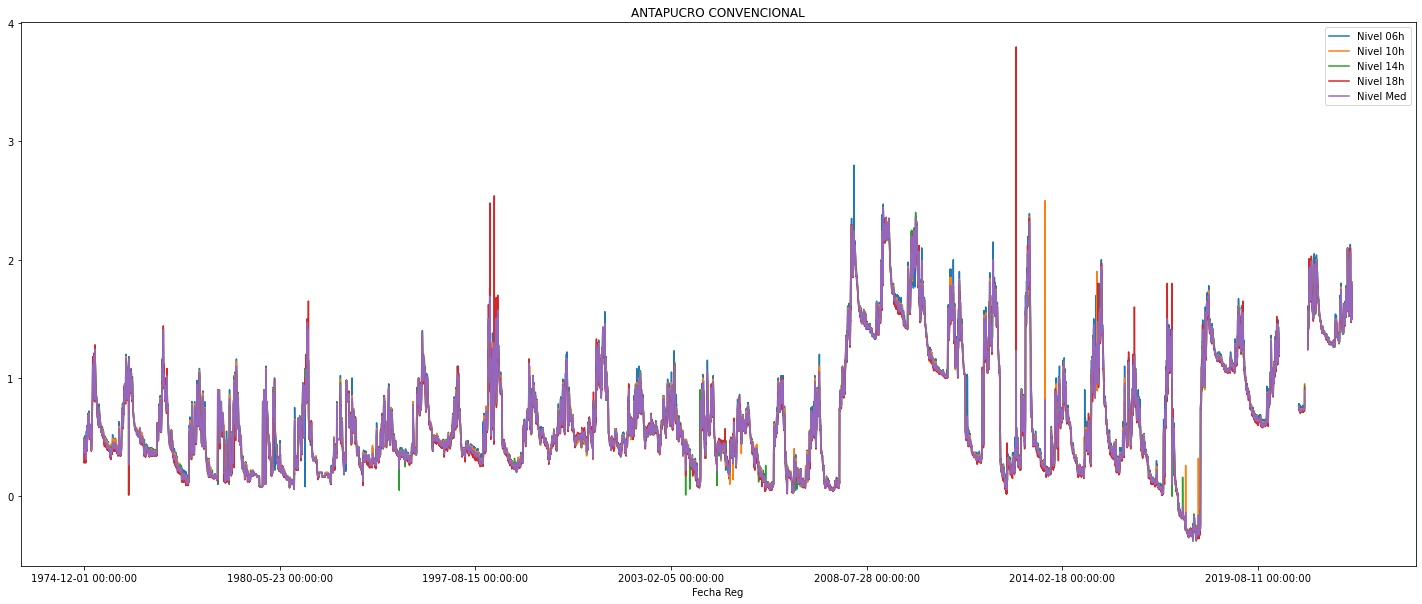

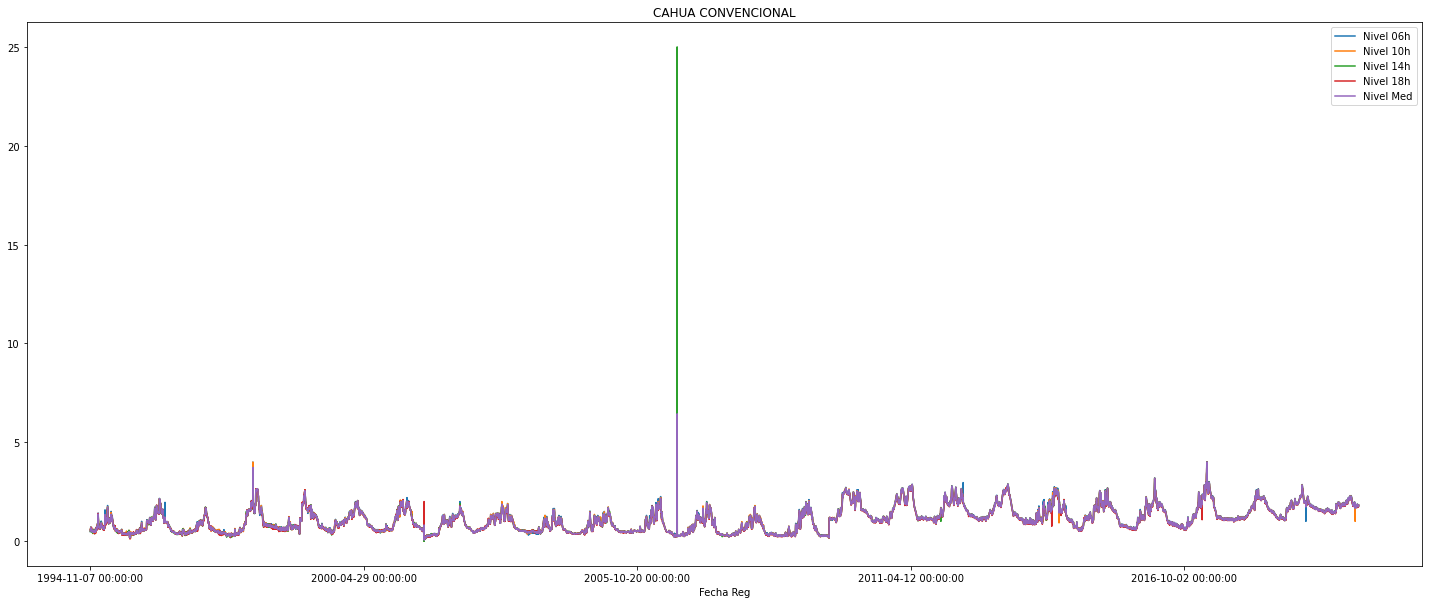

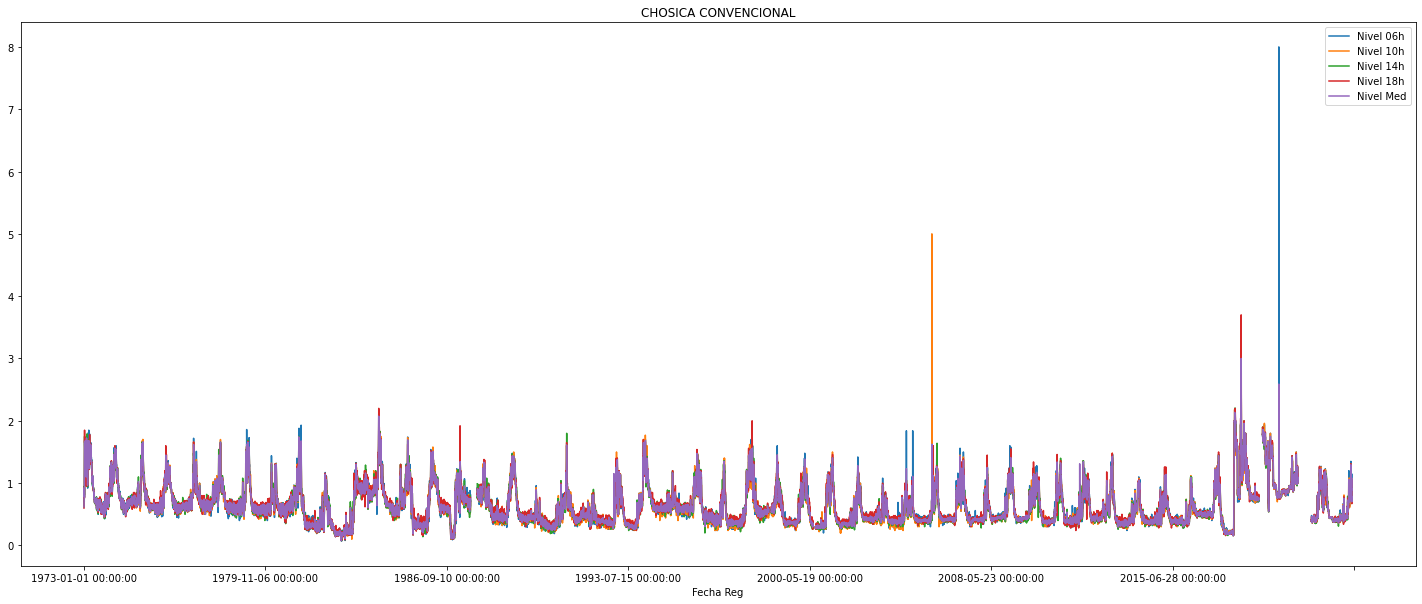

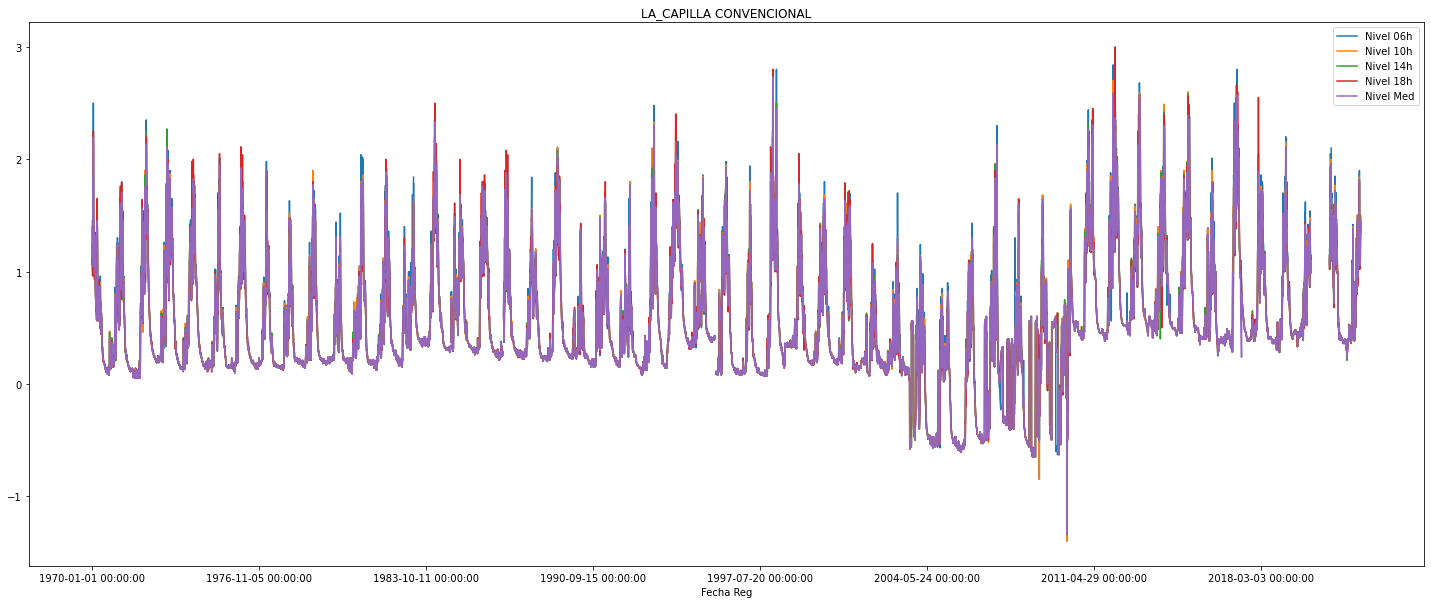

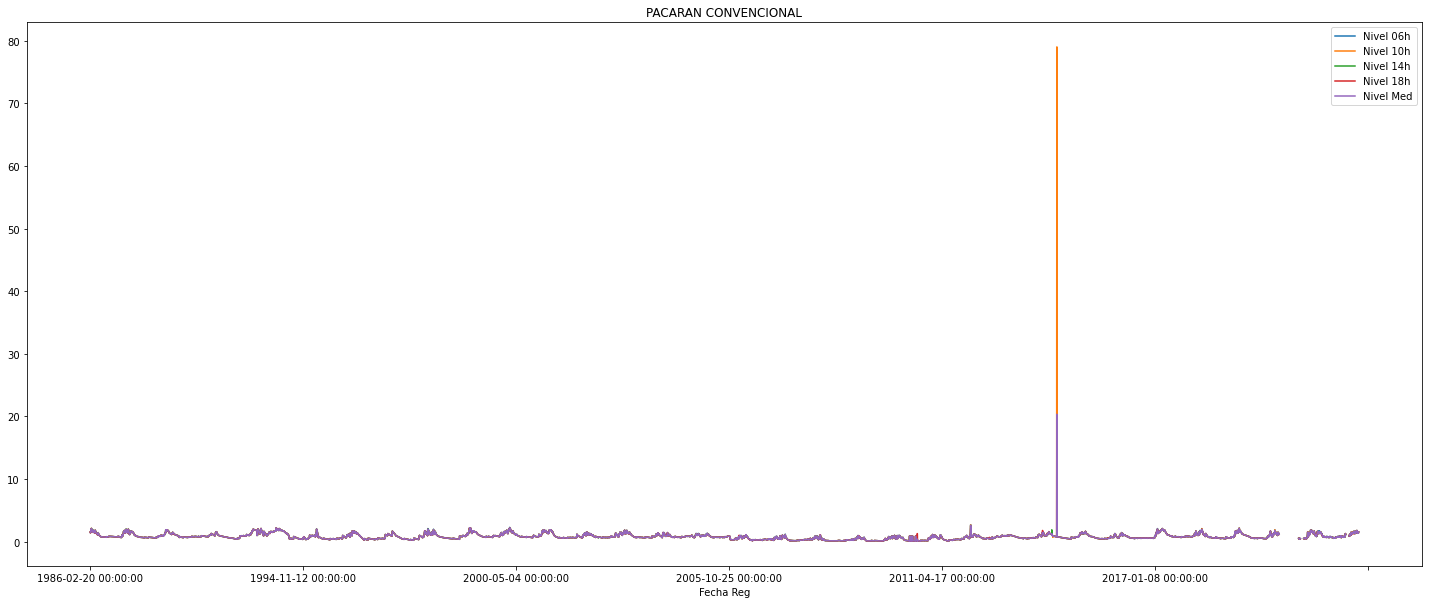

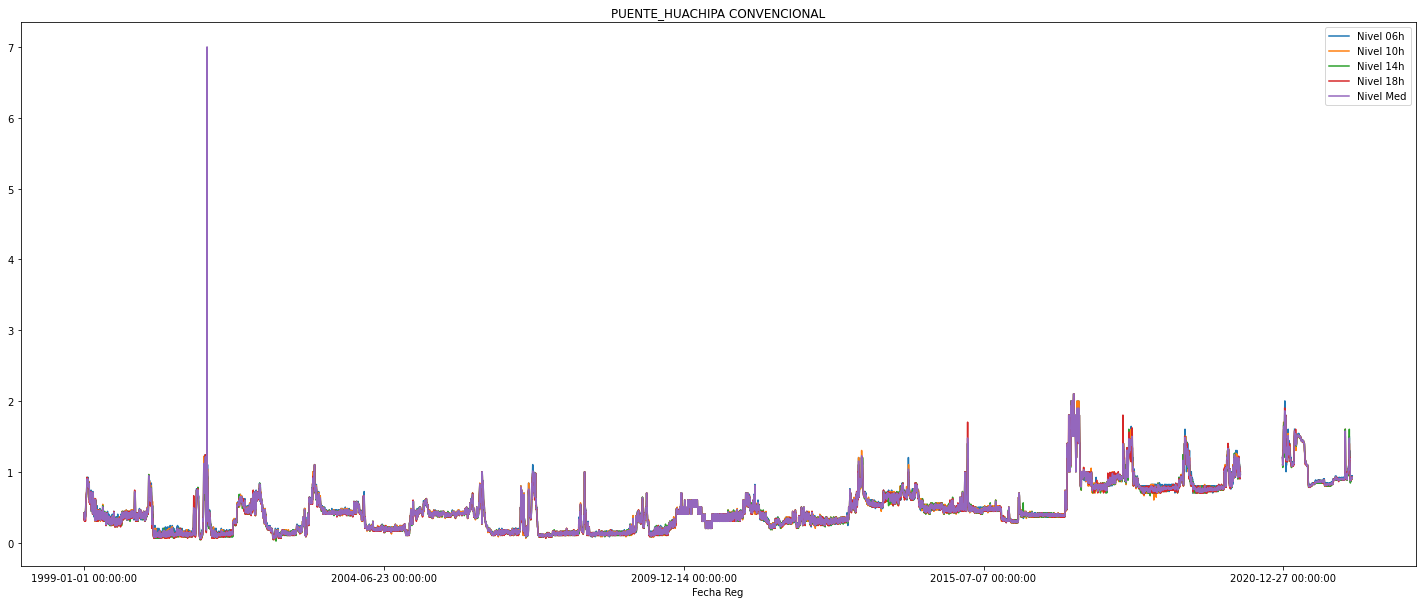

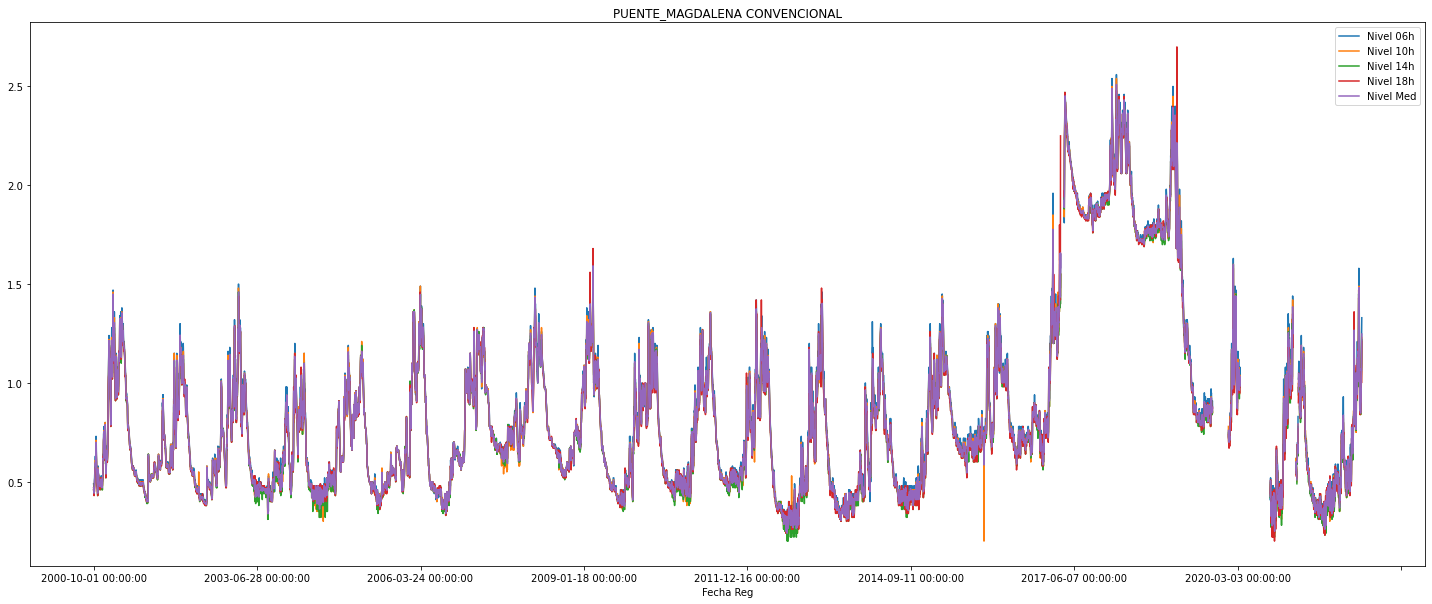

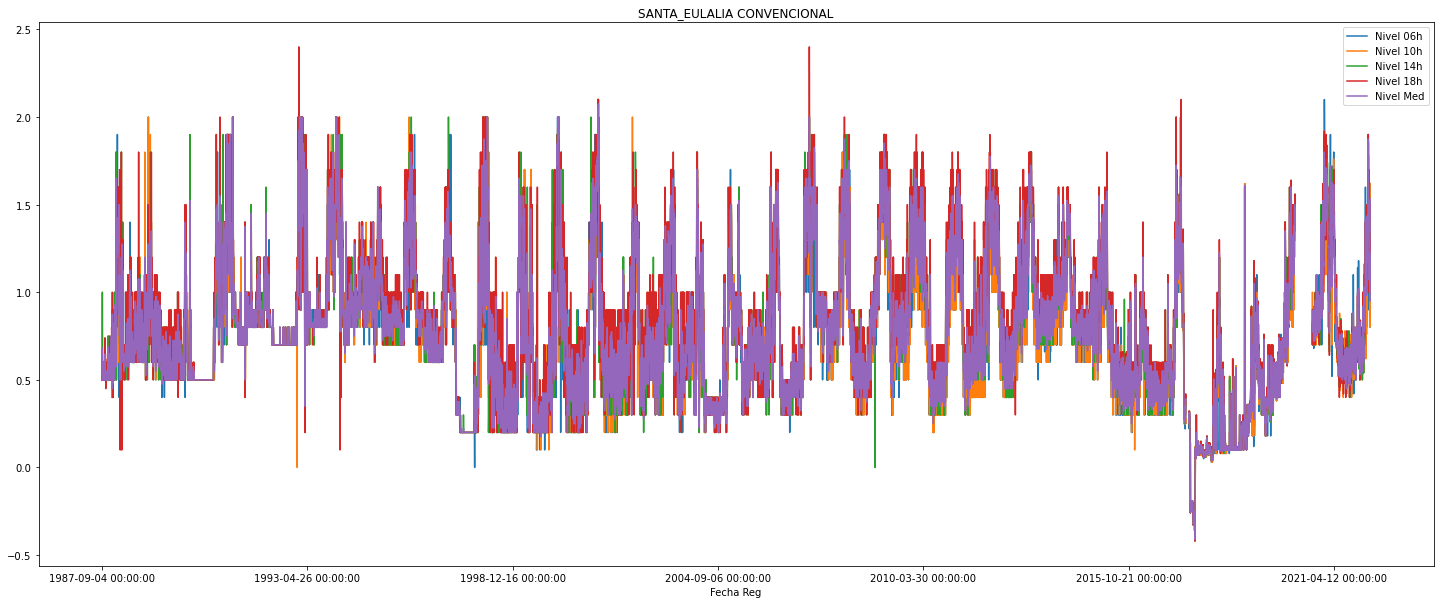

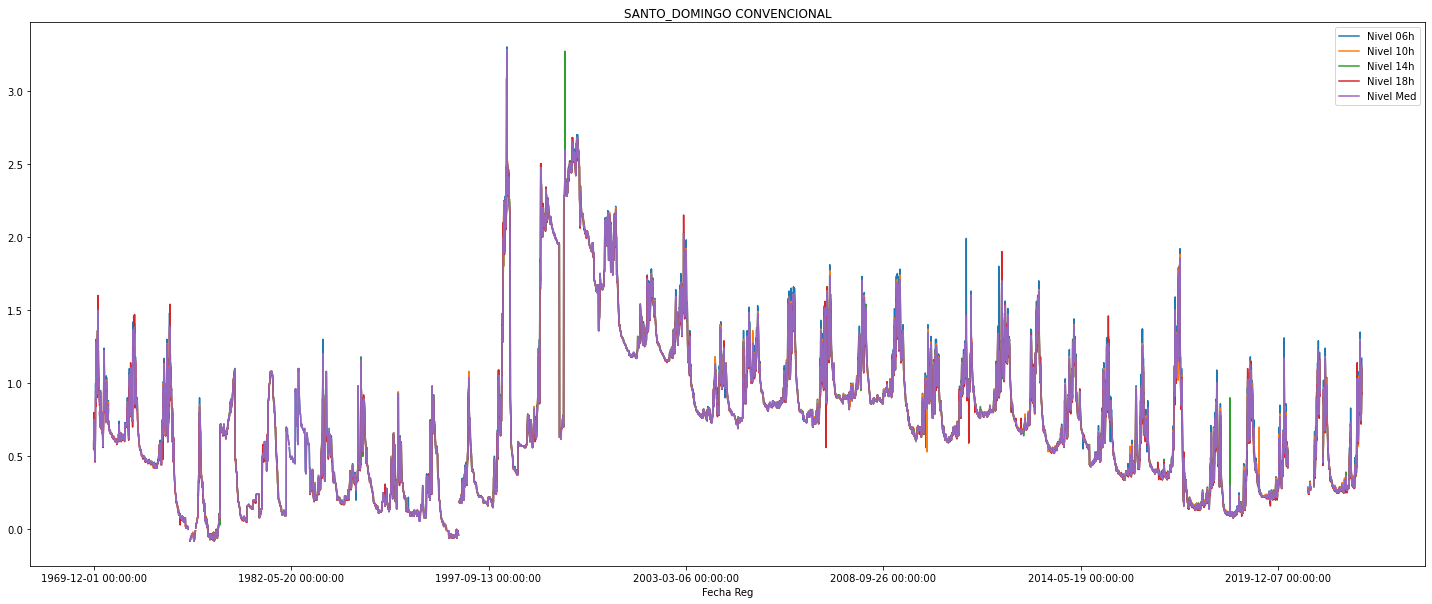

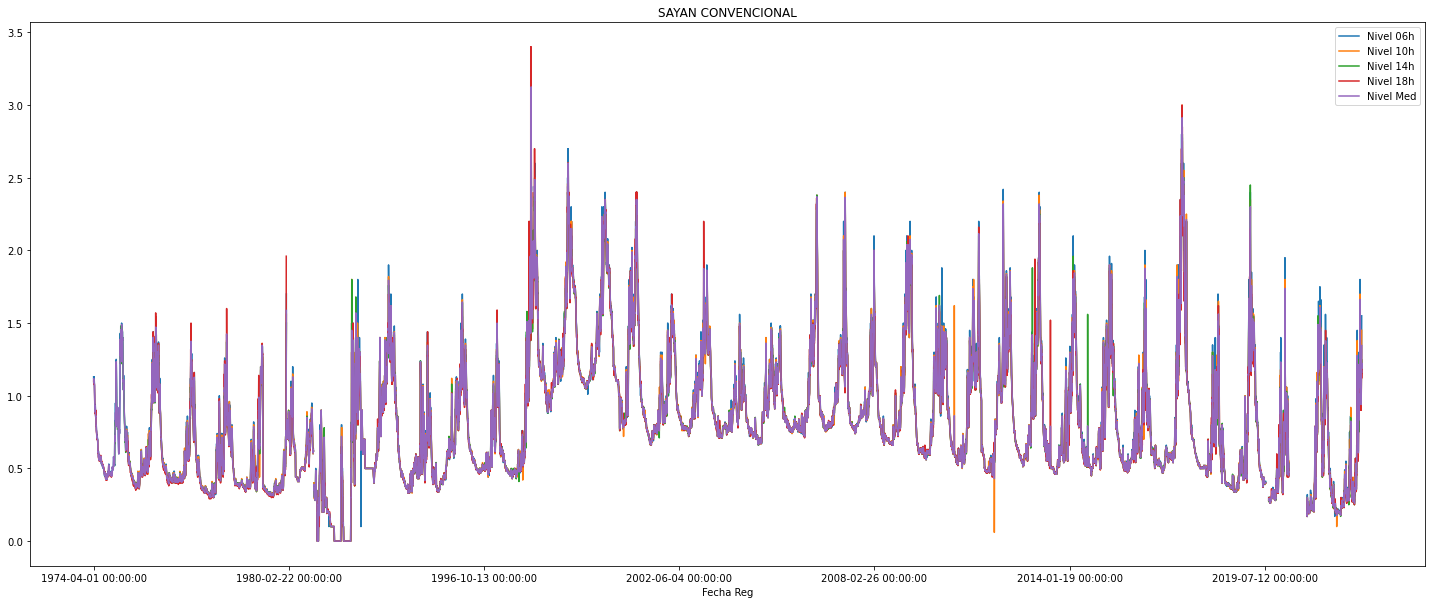

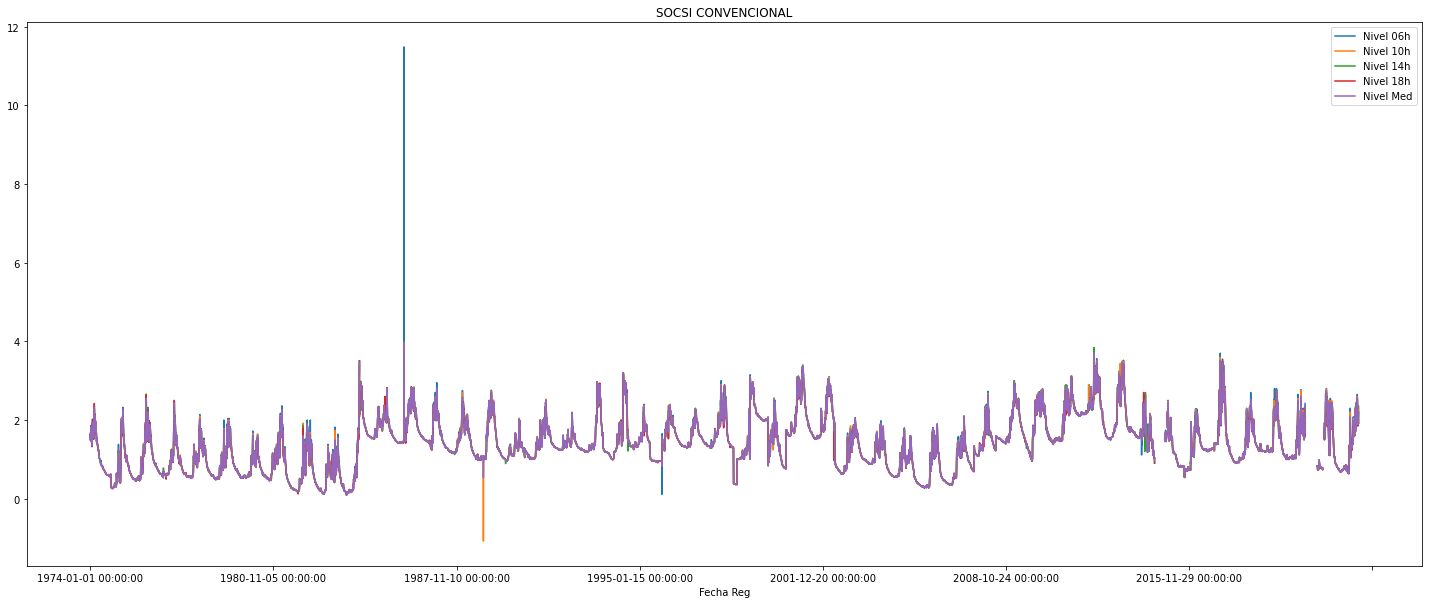

In [58]:
EDA.plot_dz_niveles()

In [59]:
EDA.stats_dz_niveles()

AUTISHA CONVENCIONAL
          Nivel 06h     Nivel 10h     Nivel 14h     Nivel 18h     Nivel Med
count  11827.000000  11827.000000  11825.000000  11827.000000  11827.000000
mean       0.406861      0.405390      0.400923      0.399617      0.403208
std        0.391767      0.388924      0.386092      0.386561      0.386476
min        0.000000      0.000000      0.000000      0.000000      0.000000
25%        0.140000      0.140000      0.140000      0.140000      0.140000
50%        0.260000      0.260000      0.260000      0.260000      0.260000
75%        0.580000      0.580000      0.560000      0.550000      0.565000
max        3.000000      3.000000      3.000000      3.000000      3.000000
OBRAJILLO CONVENCIONAL
          Nivel 06h     Nivel 10h     Nivel 14h     Nivel 18h     Nivel Med
count  19291.000000  19260.000000  17519.000000  19260.000000  19292.000000
mean       0.978362      0.973495      0.976050      0.975771      0.975671
std        0.203584      0.201120      0.199